### Implement linear regression with multi-variables to predict the prices of houses. 

Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices.

<img src="./images/house_price.jpeg" alt="Image for illustration purpose only" width="200" />

The 'housing_price_prediction.txt' contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.

In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

#### Data Visualization

Text(0.5,0,'number of bedrooms')

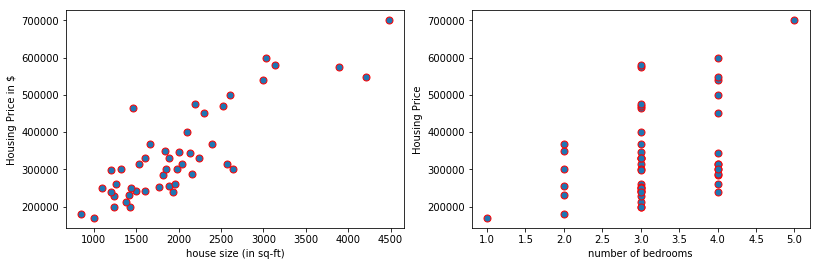

In [332]:
# Load Data
with open('data/housing_price_data.txt', 'r') as f:
    data = f.readlines()
data = [list(map(float, i.split(','))) for i in data]
data = np.array(data)
X = data[:,:-1]; y = data[:,-1]
m = len(y)     # number of training examples
y = y.reshape(m,1)

fig = plt.figure(figsize=plt.figaspect(0.3))
ax = fig.add_subplot(1, 2, 1)
ax.plot(X[:,0],y, 'ro', markersize=7, markerfacecolor='C0')
plt.ylabel('Housing Price in $')
plt.xlabel('house size (in sq-ft)')

ax = fig.add_subplot(1, 2, 2)
ax.plot(X[:,1],y, 'ro', markersize=7, markerfacecolor='C0')
plt.ylabel('Housing Price')
plt.xlabel('number of bedrooms')



#### Data Processing

In [333]:
# Feature Normalization
def featureNormalize(X):
    X_norm = X
    mu = np.zeros((1,X.shape[1]))      # mean of each feature, e.g. house size value
    sigma = np.zeros((1,X.shape[1]))   # Standard deviation of each feature
    m = X.shape[0]
    # USING np.mean() and np.std() is simpler for implementation.
    mu = (np.sum(X,axis=0)/m)
    sigma = np.sqrt( np.sum((X- np.multiply(np.ones((m,1)),mu))**2, axis=0)/m ) 
    X_norm = np.divide( (X- np.multiply(np.ones((m,1)), mu) ), (np.multiply(np.ones((m,1)), sigma)) )
    return X_norm, mu, sigma

X, mu, sigma = featureNormalize(X)

#### Implement Cost function and Gradient Descent

In [334]:
X = np.append(np.ones((m,1)),X, axis=1)
alpha = 0.01
num_iters = 400
theta = np.zeros((X.shape[1], 1))

def computeCost(X,y,theta):
    m = y.shape[0]
    J = 0
    J=1./(2*m)*np.sum( (X.dot(theta) - y)**2, axis=0)
    return J

def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros((num_iters,1))
    for iter in range(num_iters):
        theta = theta - alpha/m*(np.transpose(np.transpose(X.dot(theta)-y).dot(X)) )
        J_history[iter] = computeCost(X,y,theta)
        #if (iter%100 == 0):
            #print('J is now: %f' % J_history[iter])
    return theta, J_history
    
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters);

#### Prediction of housing price 

In [335]:
# for a house of 1650 sq-ft, 3 br:
price = np.array([1, (1650-mu[0])/sigma[0], (3-mu[1])/sigma[1]]).dot(theta)
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n $%f' % price)

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $289221.547371


### Appendix
#### Convergence of gradient descent with different learning rates 

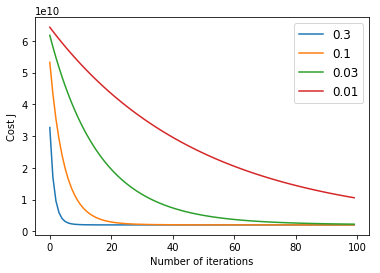

In [336]:
fig, ax = plt.subplots()
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
for i in [0.3, 0.1, 0.03, 0.01]:  # Different learning rates
    iterations = 100
    J_history = np.zeros((iterations))
    theta = np.zeros((X.shape[1],1))
    _, J_history = gradientDescentMulti(X,y,theta, i, iterations)
    ax.plot(np.array(list(range(iterations))).reshape(-1), J_history, '-' , label =i )

legend = ax.legend(loc='upper right', shadow=False, fontsize='large')